In [55]:
from hstar import process
from hstar import trilinear
from hstar import datacuts
import numpy as np
import awkward as awk
import vector   
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras import Model, backend

from sklearn.model_selection import train_test_split

In [56]:
SEED = 12345678

In [57]:
sample = process.Sample(weight='wt', 
    amplitude = process.Basis.SBI, components = {
    process.Basis.SBI: 'msq_sbi_sm',
    process.Basis.SIG: 'msq_sig_sm',
    process.Basis.BKG: 'msq_bkg_sm',
    process.Basis.INT: 'msq_int_sm'
  })

sample.open(csv = [
  '../ggZZ4e_all.csv',
  '../ggZZ4m_all.csv',
  '../ggZZ2e2m_all.csv'
  ], xs=[1.4783394, 0.47412769, 0.47412769], lumi=3000., k=1.83
)

0         6.917263e-12
1         4.352699e-10
2         1.308438e-09
3         1.289731e-09
4         1.347206e-13
              ...     
999995    1.636316e-10
999996    3.865264e-09
999997    1.651681e-09
999998    2.418478e-09
999999    2.313256e-09
Name: msq_sbi_sm, Length: 3000000, dtype: float64
0         7.188679e-14
1         3.480814e-11
2         1.946946e-11
3         1.735510e-11
4         6.937647e-15
              ...     
999995    3.295963e-11
999996    4.442759e-11
999997    2.035349e-10
999998    2.338224e-09
999999    3.409817e-11
Name: msq_sig_sm, Length: 3000000, dtype: float64
0         7.326895e-12
1         4.924589e-10
2         1.370247e-09
3         1.360140e-09
4         1.353117e-13
              ...     
999995    1.945970e-10
999996    4.070516e-09
999997    1.869602e-09
999998    2.144030e-09
999999    2.394497e-09
Name: msq_bkg_sm, Length: 3000000, dtype: float64
0        -4.813897e-13
1        -9.161463e-11
2        -8.107657e-11
3        -8.776563e-11

In [71]:
sample.events

,evtnum,p1_px,p1_py,p1_pz,p1_E,p2_px,p2_py,p2_pz,p2_E,p3_px,...,msq_sig_c6_19,msq_int_c6_19,msq_sbi_c6_19,msq_sig_c6_20,msq_int_c6_20,msq_sbi_c6_20,msq_sig_c6_21,msq_int_c6_21,msq_sbi_c6_21,wt
1,1,0.0,0.0,-77.73249,-77.73249,0.0,0.0,194.50560,-194.50560,14.811680,...,2.753983e-11,-8.120834e-11,4.318080e-10,2.531208e-11,-7.784972e-11,4.306987e-10,2.288998e-11,-7.403362e-11,4.294985e-10,4.151191e-07
2,2,0.0,0.0,-262.56340,-262.56340,0.0,0.0,33.75826,-33.75826,-15.090700,...,1.697654e-11,-7.621766e-11,1.307863e-09,1.621236e-11,-7.466543e-11,1.307530e-09,1.536585e-11,-7.290323e-11,1.307032e-09,7.570440e-07
3,3,0.0,0.0,-53.52656,-53.52656,0.0,0.0,200.04530,-200.04530,71.767870,...,1.483808e-11,-8.146483e-11,1.290610e-09,1.408582e-11,-7.948154e-11,1.290732e-09,1.325639e-11,-7.723254e-11,1.290753e-09,1.773809e-06
5,5,0.0,0.0,-182.99060,-182.99060,0.0,0.0,88.76553,-88.76553,-6.396720,...,3.731679e-13,-1.040594e-12,1.456901e-11,3.362568e-13,-9.483181e-13,1.462435e-11,2.970184e-13,-8.445294e-13,1.468720e-11,7.885308e-07
6,6,0.0,0.0,-516.36430,-516.36430,0.0,0.0,50.10318,-50.10318,-4.343655,...,4.536678e-11,-2.924180e-11,2.200750e-10,4.452230e-11,-2.850509e-11,2.189515e-10,4.364472e-11,-2.766318e-11,2.177254e-10,2.073066e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,99994,0.0,0.0,-149.04090,-149.04090,0.0,0.0,171.55200,-171.55200,76.721890,...,1.066725e-10,-1.065634e-10,8.957682e-10,1.046035e-10,-1.013621e-10,8.960901e-10,1.024520e-10,-9.541523e-11,8.965586e-10,7.341591e-07
99995,99995,0.0,0.0,-77.12156,-77.12156,0.0,0.0,178.11320,-178.11320,-21.069980,...,2.130019e-12,-6.970099e-12,9.478210e-11,1.993564e-12,-6.738452e-12,9.468258e-11,1.843866e-12,-6.476566e-12,9.456351e-11,3.615236e-07
99997,99997,0.0,0.0,-137.97780,-137.97780,0.0,0.0,257.61670,-257.61670,-34.069890,...,8.273489e-13,-8.016316e-13,4.180219e-12,8.241841e-13,-7.897173e-13,4.185301e-12,8.213913e-13,-7.758864e-13,4.191711e-12,7.751869e-07
99998,99998,0.0,0.0,-148.30000,-148.30000,0.0,0.0,68.95729,-68.95729,32.213700,...,2.273908e-11,-8.172102e-11,1.001553e-09,2.163622e-11,-7.982460e-11,1.001502e-09,2.041697e-11,-7.767200e-11,1.001370e-09,2.648151e-07


In [59]:
sample.events = sample.events[:100000]

evt = datacuts.Events4l(sample)

# Get the seven kinematic variables used as input for the NN
obs_data = evt.get_kinematics()

initialized momenta
Z1 masses different in  6.273 % of cases
Z2 masses different in  6.273 % of cases
found Z
filtered events


/home/max/Uni/WS24/BachelorArbeit/higgs-offshell-interpretation/hstar/datacuts.py:277: RuntimeWarning: invalid value encountered in divide
  phi = z1.dot(n12.cross(n34))/np.abs(z1.dot(n12.cross(n34)))*np.arccos(-n12.dot(n34))
/home/max/Uni/WS24/BachelorArbeit/higgs-offshell-interpretation/hstar/datacuts.py:277: RuntimeWarning: invalid value encountered in arccos
  phi = z1.dot(n12.cross(n34))/np.abs(z1.dot(n12.cross(n34)))*np.arccos(-n12.dot(n34))


In [60]:
'''fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,10))

hist1, bins1 = np.histogram(evt.Z1_true_angles, bins=100, range=(0,np.pi), weights=evt.df['wt'])
hist2, bins2 = np.histogram(evt.Z1_angles, bins=100, range=(0,np.pi), weights=evt.df['wt'])

hist3, bins3 = np.histogram(evt.Z2_true_angles, bins=100, range=(0,np.pi), weights=evt.df['wt'])
hist4, bins4 = np.histogram(evt.Z2_angles, bins=100, range=(0,np.pi), weights=evt.df['wt'])

ax1.step(bins2[:-1], hist2, label=u'$\Delta\Phi$ for Z1, true Z1', color='b')
ax1.step(bins1[:-1], hist1, label=u'$\Delta\Phi$ for Z1, reconstructed Z1', color='r')
ax1.set_xlabel('angle [rad]')
ax1.set_ylabel('weighted count []')
ax1.legend()

ax2.step(bins4[:-1], hist4, label=u'$\Delta\Phi$ for Z2, true Z2', color='b')
ax2.step(bins3[:-1], hist3, label=u'$\Delta\Phi$ for Z2, reconstructed Z2', color='r')
ax2.set_xlabel('angle [rad]')
ax2.set_ylabel('weighted count []')
ax2.legend()


plt.show()'''

"fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,10))\n\nhist1, bins1 = np.histogram(evt.Z1_true_angles, bins=100, range=(0,np.pi), weights=evt.df['wt'])\nhist2, bins2 = np.histogram(evt.Z1_angles, bins=100, range=(0,np.pi), weights=evt.df['wt'])\n\nhist3, bins3 = np.histogram(evt.Z2_true_angles, bins=100, range=(0,np.pi), weights=evt.df['wt'])\nhist4, bins4 = np.histogram(evt.Z2_angles, bins=100, range=(0,np.pi), weights=evt.df['wt'])\n\nax1.step(bins2[:-1], hist2, label=u'$\\Delta\\Phi$ for Z1, true Z1', color='b')\nax1.step(bins1[:-1], hist1, label=u'$\\Delta\\Phi$ for Z1, reconstructed Z1', color='r')\nax1.set_xlabel('angle [rad]')\nax1.set_ylabel('weighted count []')\nax1.legend()\n\nax2.step(bins4[:-1], hist4, label=u'$\\Delta\\Phi$ for Z2, true Z2', color='b')\nax2.step(bins3[:-1], hist3, label=u'$\\Delta\\Phi$ for Z2, reconstructed Z2', color='r')\nax2.set_xlabel('angle [rad]')\nax2.set_ylabel('weighted count []')\nax2.legend()\n\n\nplt.show()"

In [61]:
c6_mod = trilinear.Modifier(c6_values = [-5,-1,0,1,5], c6_amplitudes = ['msq_sbi_c6_6', 'msq_sbi_c6_10', 'msq_sbi_c6_11', 'msq_sbi_c6_12', 'msq_sbi_c6_16'])
coeffs = c6_mod.modify(sample=evt.sample, tensorize=False)[0]

In [62]:
print(coeffs.shape)

(96550, 5)


In [63]:
# Calculate weights for given c6 values (Interpolation using polynomial coefficients)
def c6weights(c6, coeffs, wt):
    N = coeffs.shape[1]
    return np.array(wt*np.sum([coeffs.T[i]*c6**(N-1-i) for i in range(N)], axis=0))

In [64]:
np.random.seed(SEED)
c6_vals = 4*np.ones(coeffs.shape[0])#(np.random.rand(coeffs.shape[0])-0.5)*20.0

In [65]:
sample_weights_background = np.array(evt.df['wt'])
sample_weights_signal = c6weights(c6_vals, coeffs, evt.df['wt'])

labels_background = np.zeros(len(sample_weights_background))
labels_signal = np.zeros(len(sample_weights_signal))+1

input_data = np.append(np.array(obs_data), c6_vals[:,np.newaxis], axis=1)

In [66]:

def swish_activation(x, b=1):
    return x*backend.sigmoid(b*x)

get_custom_objects().update({'swish_activation': Activation(swish_activation)})


class C6_4l_clf(Model):
    def __init__(self):
        super().__init__()

        swish = Activation(swish_activation, name='Swish')

        self.dense1 = Dense(1000, activation=swish, input_dim=8, kernel_initializer='he_normal')
        self.dense2 = Dense(1000, activation=swish, kernel_initializer='he_normal')
        self.dense3 = Dense(1000, activation=swish, kernel_initializer='he_normal')
        self.dense4 = Dense(1000, activation=swish, kernel_initializer='he_normal')
        self.dense5 = Dense(1000, activation=swish, kernel_initializer='he_normal')
        self.out = Dense(1, activation='sigmoid')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        x = self.dense4(x)
        x = self.dense5(x)
        return self.out(x)

In [67]:
model = C6_4l_clf()

optimizer = Nadam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'], weighted_metrics=['binary_accuracy'])

In [68]:
# Data shuffling

np.random.seed(SEED)

data_bkg = np.append(np.append(input_data, labels_background[:,np.newaxis], axis=1), sample_weights_background[:,np.newaxis], axis=1)
data_sig = np.append(np.append(input_data, labels_signal[:,np.newaxis], axis=1), sample_weights_signal[:,np.newaxis], axis=1)
data = np.append(data_bkg, data_sig, axis=0)

print(data)

np.random.shuffle(data)

#X_train, X_test, y_train, y_test = train_test_split(data[:,:-2], data[:,-2], train_size=0.5, test_size=0.5, random_state=SEED, shuffle=True)

[[ 9.66332908e-01  9.90706697e-01  5.84209211e-01 ...  4.00000000e+00
   0.00000000e+00  4.15119131e-07]
 [-9.98711253e-01  9.97202928e-01  9.92340082e-01 ...  4.00000000e+00
   0.00000000e+00  7.57043979e-07]
 [ 9.75839094e-01  9.82358700e-01  9.67760103e-01 ...  4.00000000e+00
   0.00000000e+00  1.77380856e-06]
 ...
 [ 9.22829078e-01  9.84414881e-01 -8.95395158e-01 ...  4.00000000e+00
   1.00000000e+00  7.74743121e-07]
 [-8.82163447e-01  9.72446519e-01  7.95257791e-01 ...  4.00000000e+00
   1.00000000e+00  2.64815918e-07]
 [-8.56989426e-01  9.89848143e-01 -5.81728829e-01 ...  4.00000000e+00
   1.00000000e+00  1.72141997e-06]]


In [69]:
data[[0,5]]

array([[ 6.24372613e-01, -1.26376006e-01,  9.91729095e-01,
        -1.99669555e+00, -1.53965733e+00,  8.88232778e+01,
         8.67388989e+01,  4.00000000e+00,  1.00000000e+00,
         1.53925528e-07],
       [-9.75233968e-01,  9.96471983e-01,  9.62949893e-01,
         1.72565455e+00,  2.56563583e+00,  9.32500973e+01,
         9.21787233e+01,  4.00000000e+00,  0.00000000e+00,
         3.49950840e-07]])

In [ ]:
sm_weights = sample.events['wt']/np.sum(sample.events['wt']) # Normalize SM SBI weights
c6_weights = []

def normalize_col(dataframe, colname, weigths='wt', msq_sm='msq_sbi_sm'):
    reweight = dataframe[weigths]*dataframe[colname]/dataframe[msq_sm] # Weights for column of msq
    factor = 1/np.sum(reweight) # Determine factor for normalization
    return dataframe[colname]*factor # Return normalized column


# only SBI used so far
for col in ['msq_sbi_c6_'+str(i) for i in range(1,22)]:
    sample.events[col] = normalize_col(sample.events, col)

In [70]:
history = model.fit(data[:,:-2], data[:,-2], sample_weight=data[:,-1], validation_split=0.5, epochs=10)

Epoch 1/10
3018/3018 [==============================] - 254s 83ms/step - loss: nan - binary_accuracy: 0.4998 - weighted_binary_accuracy: 0.5006 - val_loss: nan - val_binary_accuracy: 0.5002 - val_weighted_binary_accuracy: 0.4994
Epoch 2/10
3018/3018 [==============================] - 234s 78ms/step - loss: nan - binary_accuracy: 0.4998 - weighted_binary_accuracy: 0.5006 - val_loss: nan - val_binary_accuracy: 0.5002 - val_weighted_binary_accuracy: 0.4994
Epoch 3/10
3018/3018 [==============================] - 679s 225ms/step - loss: nan - binary_accuracy: 0.4998 - weighted_binary_accuracy: 0.5006 - val_loss: nan - val_binary_accuracy: 0.5002 - val_weighted_binary_accuracy: 0.4994
Epoch 4/10
3018/3018 [==============================] - 251s 83ms/step - loss: nan - binary_accuracy: 0.4998 - weighted_binary_accuracy: 0.5006 - val_loss: nan - val_binary_accuracy: 0.5002 - val_weighted_binary_accuracy: 0.4994
Epoch 5/10
3018/3018 [==============================] - 248s 82ms/step - loss: nan 

KeyboardInterrupt: 

In [ ]:
model.save('../bsc-thesis/models/model_real_state')

In [ ]:
history.history

{'loss': [6.215043981683266e-07,
  3.850360315027501e-07,
  3.849994811844226e-07,
  3.8497174159601855e-07,
  3.8499317156492907e-07,
  3.849997654015169e-07,
  3.849852703297074e-07,
  3.8497435639328614e-07,
  3.84970320510547e-07,
  3.849785912279913e-07],
 'binary_accuracy': [0.49984443187713623,
  0.49979257583618164,
  0.5004460215568542,
  0.49931544065475464,
  0.5005704760551453,
  0.5008297562599182,
  0.5005393624305725,
  0.4996369779109955,
  0.4994606673717499,
  0.49902504682540894],
 'weighted_binary_accuracy': [0.5041115880012512,
  0.5041941404342651,
  0.500041127204895,
  0.503778874874115,
  0.4989200532436371,
  0.4993877708911896,
  0.5008733868598938,
  0.5051799416542053,
  0.5008582472801208,
  0.5027204155921936],
 'val_loss': [3.9130904383455345e-07,
  3.9126558704083436e-07,
  3.9124304862525605e-07,
  3.912225281510473e-07,
  3.913003752131772e-07,
  3.9127417039708234e-07,
  3.9123892747738864e-07,
  3.912705039965658e-07,
  3.9141326624303474e-07,
  3.9

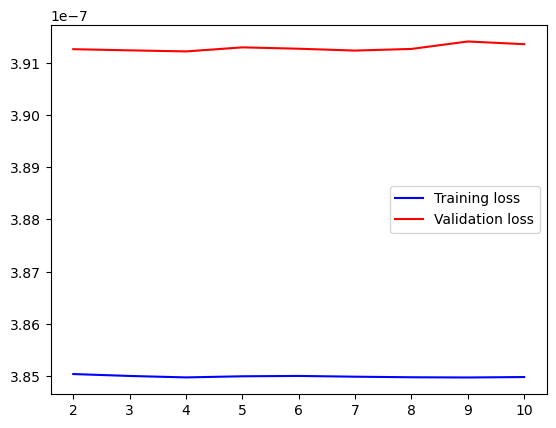

In [ ]:
epochs = list(range(1,11))

plt.plot(epochs[1:], history.history['loss'][1:], color='b', label='Training loss')
plt.plot(epochs[1:], history.history['val_loss'][1:], color='r', label='Validation loss')

plt.legend()

plt.show()

In [ ]:
model.summary()

Model: "c6_4l_clf"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               multiple                  9000      
                                                                 
 dense_1 (Dense)             multiple                  1001000   
                                                                 
 dense_2 (Dense)             multiple                  1001000   
                                                                 
 dense_3 (Dense)             multiple                  1001000   
                                                                 
 dense_4 (Dense)             multiple                  1001000   
                                                                 
 dense_5 (Dense)             multiple                  1001      
                                                                 
Total params: 4,014,001
Trainable params: 4,014,001
Non-t

In [ ]:
predictions = model.predict(data[40000:60000,:-2])

print(min(predictions), max(predictions))
print(predictions, predictions.shape)

loss = model.compute_loss(x=tf.convert_to_tensor(data[40000:60000,:-2]), y=tf.convert_to_tensor(data[40000:60000,-2]), y_pred=tf.convert_to_tensor(predictions.astype(np.float64)), sample_weight=tf.convert_to_tensor(data[40000:60000, -1]))
print(loss)

625/625 [==============================] - 8s 13ms/step
[0.49075487] [0.52513766]
[[0.5069425 ]
 [0.50694627]
 [0.50694275]
 ...
 [0.50694084]
 [0.5069035 ]
 [0.50693613]] (20000, 1)
tf.Tensor(3.8517021664739865e-07, shape=(), dtype=float64)


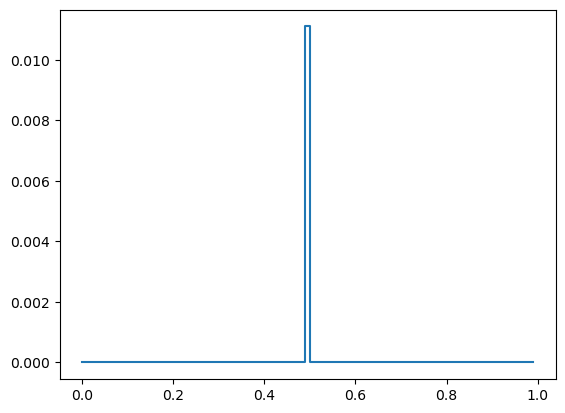

In [ ]:
factors = predictions/np.ones(predictions.shape)
wt = data[40000:60000,-1][:,np.newaxis]

hist, bins = np.histogram(factors, bins=100, range=(0,1), weights=wt)

plt.step(bins[:-1], hist)